In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from vtk_rw import read_vtk
from plotting import plot_surf_stat_map, crop_img

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [45]:
def plot_inflated(data, v, f, sulc, thr=1e-50, vmin=None, vmax=None, symmetric=False, cmap='coolwarm'):
    
    if vmin==None:
        vmin=np.nanmin(data)
    if vmax==None:
        vmax=np.nanmax(data)
        
    
    sns.set_style('white')
    lat=plot_surf_stat_map(v, f, stat_map=data, bg_map=sulc, bg_on_stat=True, darkness=0.4, 
                        elev=180,azim=0, figsize=(10,9) ,threshold=thr, cmap=cmap, 
                        symmetric_cbar=symmetric, vmin=vmin, vmax=vmax) 

    med=plot_surf_stat_map(v, f, stat_map=data, bg_map=sulc, bg_on_stat=True,darkness=0.4,
            elev=180,azim=180, figsize=(10,9), threshold=thr, cmap=cmap, 
                           symmetric_cbar =symmetric, vmin=vmin, vmax=vmax) 

    lat_crop=crop_img(lat)
    med_crop=crop_img(med)

    fig=plt.figure()
    fig.set_size_inches(16, 8)
    ax1 = fig.add_subplot(121)
    plt.imshow(lat_crop)
    ax1.set_axis_off()
    ax2 = fig.add_subplot(122)
    plt.imshow(med_crop)
    ax2.set_axis_off()

In [4]:
def load_pickle(pkl_file):
    pkl_in = open(pkl_file, 'r')
    pkl_dict = pickle.load(pkl_in)
    pkl_in.close()
    return pkl_dict

In [5]:
colors = sns.color_palette('cubehelix', 10)

In [10]:
lh_mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/lh_lowres_new_infl50.vtk'
lh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/lh_sulc.npy'

rh_mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/rh_lowres_new_infl50.vtk'
rh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/rh_sulc.npy'

In [11]:
lh_sulc = np.load(lh_sulc_file)
lv, lf, _ = read_vtk(lh_mesh_file)

rh_sulc = np.load(rh_sulc_file)
rv, rf, _ = read_vtk(rh_mesh_file)

## Figure 3: Random data prediction

In [12]:
import pandas as pd

In [93]:
df_0 = pd.DataFrame(columns=['rh score', 'rh corr', 'rh coeff', 'lh score', 'lh corr', 'lh coeff'], index=['smooth_3', 'smooth_6', 'smooth_12', 'smooth_20'])
df_10 = pd.DataFrame(columns=['rh score', 'rh corr', 'rh coeff', 'lh score', 'lh corr', 'lh coeff'], index=['smooth_3', 'smooth_6', 'smooth_12', 'smooth_20'])


In [94]:
random_data_file = '/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/old_random/random_%s_%s_%s_t1avg_by_fc_maps_%s.pkl'

In [95]:
maps='0'
for smooth in ['smooth_3', 'smooth_6', 'smooth_12', 'smooth_20']:
    
    for hemi in ['rh', 'lh']:


        scores = []
        corrs = []
        coeffs = []
        count = 0

        for iteration in range(100):
            pkl_in = open(random_data_file%(iteration, hemi, smooth, maps), 'r')
            random_data = pickle.load(pkl_in)
            pkl_in.close()
            scores.append(random_data['score'])
            corrs.append(random_data['corr'][0])
            coeffs.append(random_data['coef'])
            count += 1


        df_0['%s score'%hemi][smooth] = scores
        df_0['%s corr'%hemi][smooth] = corrs
        df_0['%s coeff'%hemi][smooth] = coeffs

In [96]:
maps='0_to_10'
for smooth in ['smooth_3', 'smooth_6', 'smooth_12', 'smooth_20']:
    
    for hemi in ['rh', 'lh']:


        scores = []
        corrs = []
        coeffs = []
        count = 0

        for iteration in range(100):
            pkl_in = open(random_data_file%(iteration, hemi, smooth, maps), 'r')
            random_data = pickle.load(pkl_in)
            pkl_in.close()
            scores.append(random_data['score'])
            corrs.append(random_data['corr'][0])
            coeffs.append(random_data['coef'])
            count += 1


        df_10['%s score'%hemi][smooth] = scores
        df_10['%s corr'%hemi][smooth] = corrs
        df_10['%s coeff'%hemi][smooth] = coeffs

In [229]:
df_0_tidy = pd.DataFrame(columns=['Pearson correlation', 'R squared', 'Hemisphere', 'Smoothing (FWHM)'])
df_0_tidy['Hemisphere'] = 400*['left']+400*['right']
df_0_tidy['Smoothing (FWHM)'] = 2*(100*[3]+100*[6]+100*[12]+100*[20])
corrs = []
rs = []
for hemi in ['lh', 'rh']:
    for smooth in ['smooth_3', 'smooth_6', 'smooth_12', 'smooth_20']:
        corrs += df_0['%s corr'%hemi][smooth]
        rs += df_0['%s score'%hemi][smooth]

df_0_tidy['Pearson correlation'] = corrs
df_0_tidy['R squared'] = rs


df_10_tidy = pd.DataFrame(columns=['Pearson correlation', 'R squared', 'Hemisphere', 'Smoothing (FWHM)'])
df_10_tidy['Hemisphere'] = 400*['leftt']+400*['right']
df_10_tidy['Smoothing (FWHM)'] = 2*(100*[3]+100*[6]+100*[12]+100*[20])
corrs = []
rs = []
for hemi in ['lh', 'rh']:
    for smooth in ['smooth_3', 'smooth_6', 'smooth_12', 'smooth_20']:
        corrs += df_10['%s corr'%hemi][smooth]
        rs += df_10['%s score'%hemi][smooth]
df_10_tidy['Pearson correlation'] = corrs
df_10_tidy['R squared'] = rs

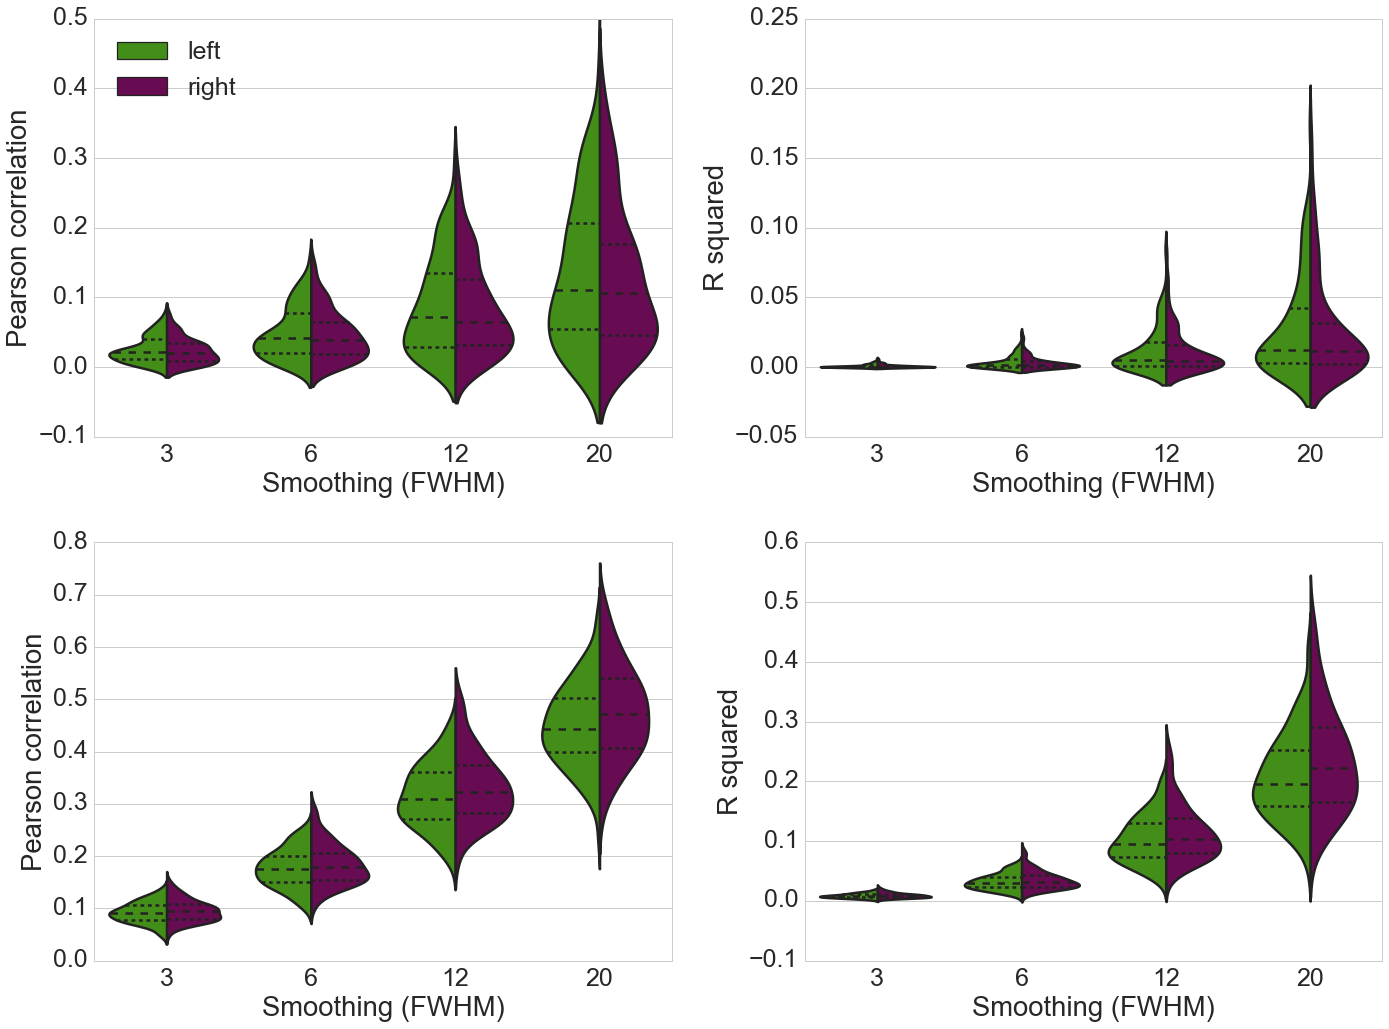

In [260]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=2.5)
cright = sns.xkcd_rgb['rich purple']
cleft = sns.xkcd_rgb['grass green']
sat = .5
lin = 2.5
fig3a = plt.figure(figsize=(20,15))

fig3a.add_subplot(221)
ax1 = sns.violinplot(x = 'Smoothing (FWHM)', y='Pearson correlation', hue='Hemisphere', data=df_0_tidy, 
               split=True, palette=[cleft,cright], inner='quartile', saturation=sat, linewidth=lin); 
plt.legend(loc=2)

fig3a.add_subplot(222)
ax2 = sns.violinplot(x = 'Smoothing (FWHM)', y='R squared', hue='Hemisphere', data=df_0_tidy, 
               split=True, palette=[cleft,cright], inner='quartile', saturation=sat, linewidth=lin); 
ax2.legend_.remove()

fig3a.add_subplot(223)
ax3 = sns.violinplot(x = 'Smoothing (FWHM)', y='Pearson correlation', hue='Hemisphere', data=df_10_tidy, 
               split=True, palette=[cleft,cright], inner='quartile', saturation=sat, linewidth=lin); 
ax3.legend_.remove()

fig3a.add_subplot(224)
ax4 = sns.violinplot(x = 'Smoothing (FWHM)', y='R squared', hue='Hemisphere', data=df_10_tidy, 
               split=True, palette=[cleft,cright], inner='quartile', saturation=sat, linewidth=lin);
ax4.legend_.remove()

fig3a.tight_layout()

In [258]:
fig3a.savefig('/scr/ilz3/myelinconnect/new_groupavg/sfn/fig3a.png')

### Plot example with residuals

In [262]:
random_data_file = '/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/old_random/random_%s_%s_%s_t1avg_by_fc_maps_%s.pkl'

In [318]:
i = 66
smooth = 'smooth_12'
hemi = 'rh'
random_data0 = load_pickle(random_data_file%(i, hemi, smooth, '0'))
random_data10 = load_pickle(random_data_file%(i, hemi, smooth, '0_to_10'))

In [322]:
random_data0['corr']

(0.099329595455323036, 4.4379677223790748e-130)

In [304]:
i = 66
smooth = 'smooth_12'
hemi = 'lh'
random_data0 = load_pickle(random_data_file%(i, hemi, smooth, '0'))
random_data10 = load_pickle(random_data_file%(i, hemi, smooth, '0_to_10'))


sns.set_style('white')
cropped_images_lh = []
for data in [random_data0['t1'], random_data0['modelled_fit'], random_data10['modelled_fit']]:
    for (elev, azim) in [(180, 0), (180, 180)]:
        plot=plot_surf_stat_map(lv, lf, stat_map=data, bg_map=lh_sulc, bg_on_stat=True, darkness=0.4, 
                            elev=elev,azim=azim, figsize=(10,9) ,threshold=1e-50, cmap='viridis', 
                            vmin=data.min(), vmax=data.max(), symmetric_cbar=False)
        cropped_images_lh.append(crop_img(plot))

In [305]:
i = 66
smooth = 'smooth_12'
hemi = 'rh'
random_data0 = load_pickle(random_data_file%(i, hemi, smooth, '0'))
random_data10 = load_pickle(random_data_file%(i, hemi, smooth, '0_to_10'))

sns.set_style('white')
cropped_images_rh = []
for data in [random_data0['t1'], random_data0['modelled_fit'], random_data10['modelled_fit']]:
    for (elev, azim) in [(180, 0), (180, 180)]:
        plot=plot_surf_stat_map(rv, rf, stat_map=data, bg_map=rh_sulc, bg_on_stat=True, darkness=0.4, 
                            elev=elev,azim=azim, figsize=(10,7.5) ,threshold=1e-50, cmap='viridis',
                            vmin=data.min(), vmax=data.max(), symmetric_cbar=False)
        cropped_images_rh.append(crop_img(plot))

In [312]:
random_data10['score']

0.43499976512784511

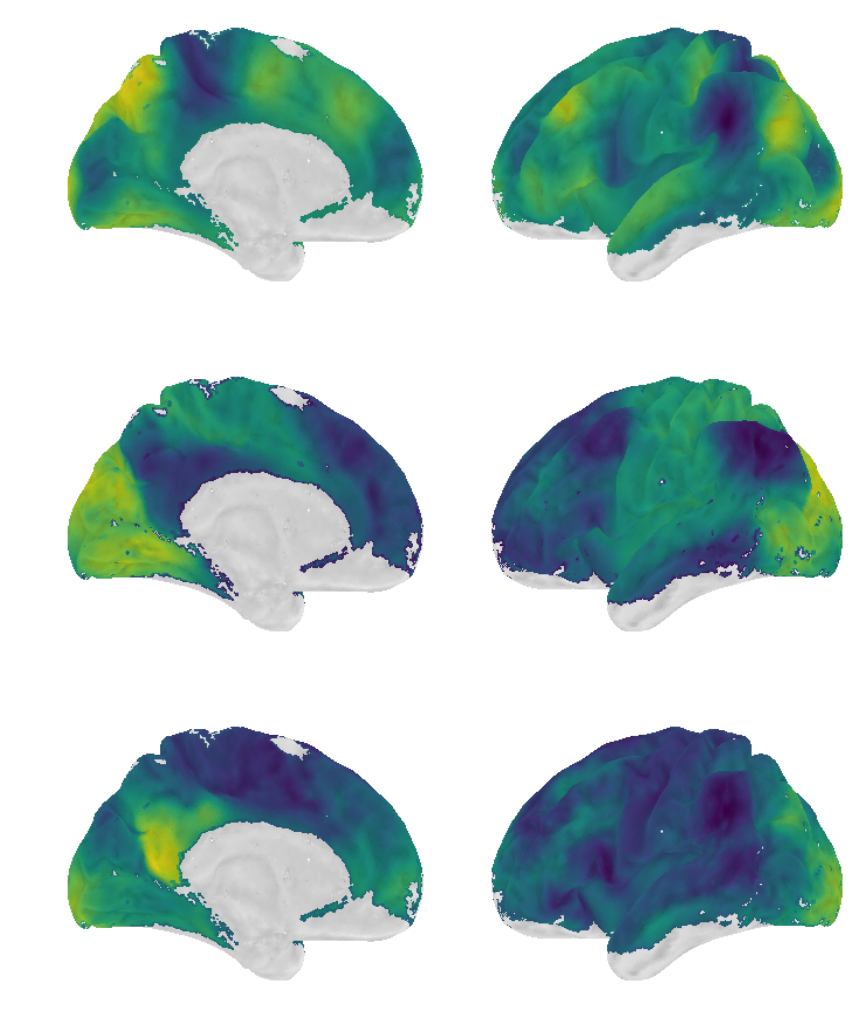

In [306]:
sns.set_style('white')
fig3b_left = plt.figure(figsize=(20,15))
for img in range(len(cropped_images_lh)):
    ax = fig3b_left.add_subplot(3,2,img+1)
    plt.imshow(cropped_images_lh[img])
    ax.set_axis_off()
fig3b_left.tight_layout()
fig3b_left.subplots_adjust(right=0.65)

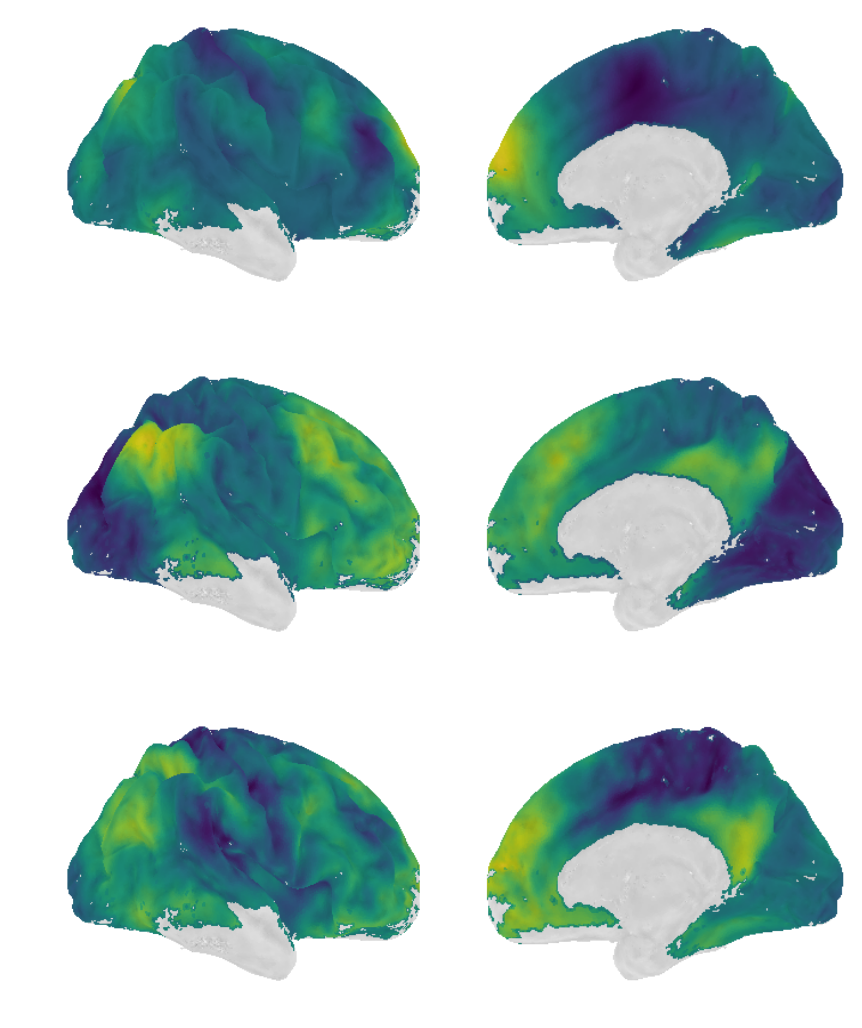

In [307]:
sns.set_style('white')
fig3b_right = plt.figure(figsize=(20,15))
for img in range(len(cropped_images_rh)):
    ax = fig3b_right.add_subplot(3,2,img+1)
    plt.imshow(cropped_images_rh[img])
    ax.set_axis_off()
fig3b_right.tight_layout()
fig3b_right.subplots_adjust(right=0.65)

In [308]:
fig3b_left.savefig('/scr/ilz3/myelinconnect/new_groupavg/sfn/fig3b_left_viridis_66_smooth_20.png')
fig3b_right.savefig('/scr/ilz3/myelinconnect/new_groupavg/sfn/fig3b_right_viridis_66_smooth_20.png')